Name: Zhuoyou Shen

ID: 2035073656

GitHub Username: zhuoyous 

In [1]:
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn 
from sklearn.neighbors import KNeighborsClassifier

(b)

i.

In [2]:
data = arff.loadarff(r'../data/vertebral_column_data/column_2C_weka.arff')
df = pd.DataFrame(data[0])
df['class']
df['class'] = df['class'].str.decode('utf-8') 
df['class'] = df['class'].replace({"Abnormal": 1 , "Normal": 0})
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


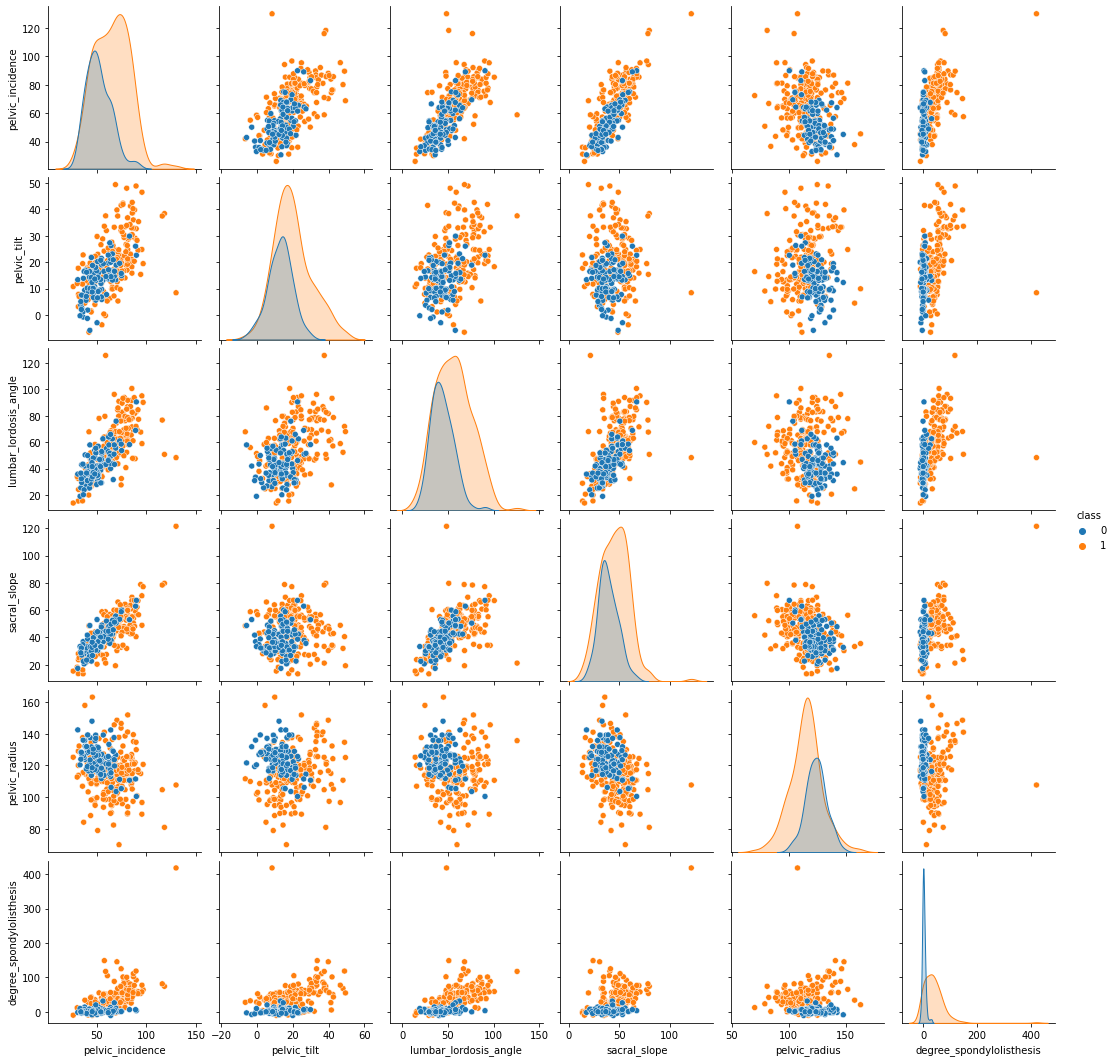

In [3]:
data = df[['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis','class']]
sns.pairplot(data,hue = 'class')

ii.

<AxesSubplot:xlabel='class', ylabel='pelvic_incidence'>

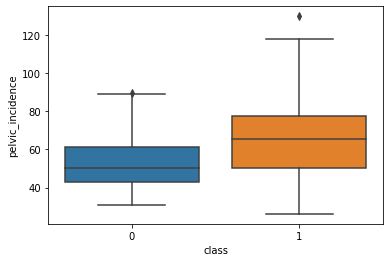

In [4]:
sns.boxplot(x = 'class',y ='pelvic_incidence',data = data)

<AxesSubplot:xlabel='class', ylabel='pelvic_tilt'>

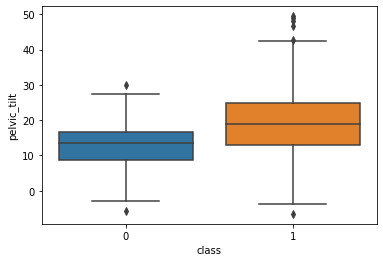

In [5]:
sns.boxplot(x = 'class',y ='pelvic_tilt',data = data)

<AxesSubplot:xlabel='class', ylabel='lumbar_lordosis_angle'>

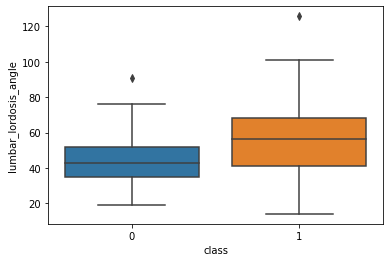

In [6]:
sns.boxplot(x = 'class',y ='lumbar_lordosis_angle',data = data)

<AxesSubplot:xlabel='class', ylabel='sacral_slope'>

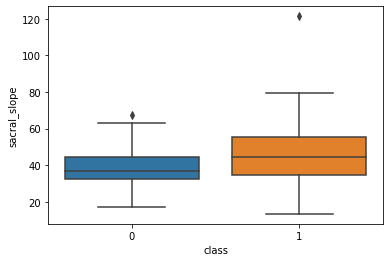

In [7]:
sns.boxplot(x = 'class',y ='sacral_slope',data = data)

<AxesSubplot:xlabel='class', ylabel='pelvic_radius'>

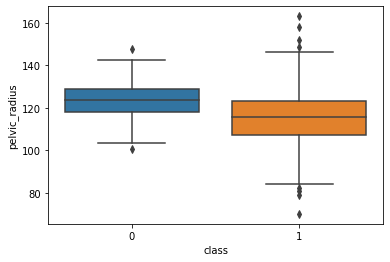

In [8]:
sns.boxplot(x = 'class',y ='pelvic_radius',data = data)

<AxesSubplot:xlabel='class', ylabel='degree_spondylolisthesis'>

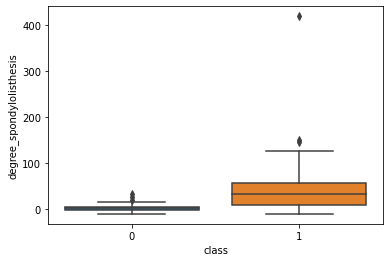

In [9]:
sns.boxplot(x = 'class',y ='degree_spondylolisthesis',data = data)

iii.

In [10]:
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


In [11]:
filt = (df['class']==1)
y1 = df[filt][:140]
y2 = df[filt][140:]
filt2 = (df['class']==0)
x1 = df[filt2][:70]
x2 = df[filt2][70:]
testing_set = x2,y2
trainning_set = x1.append(y1).drop(columns = ['class']).values

trainning_label = x1.append(y1)['class']
testing_set = x2.append(y2).drop(columns = ['class']).values
testing_label = x2.append(y2)['class']

(c)

i.

In [12]:
test_error = []
train_error =  []
for i in range(208,-2,-3):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(trainning_set,trainning_label)
    test_predict = KNN.predict(testing_set)
    test_error.append(1 - np.count_nonzero((test_predict == testing_label.values))/ len(test_predict))
    train_predict =  KNN.predict(trainning_set)
    train_error.append(1 - np.count_nonzero((train_predict == trainning_label.values))/ len(train_predict))

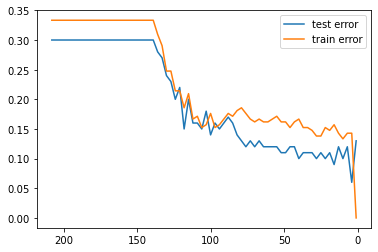

In [13]:
x_axis = np.arange(208,-2,-3)
plt.plot(x_axis,test_error,label = 'test error')
plt.plot(x_axis,train_error,label = 'train error')
plt.legend()
plt.gca().invert_xaxis()

As we can see above, we will choose k with the smallest test error, which is k = 4

In [14]:
KNN2 = KNeighborsClassifier(n_neighbors=4)
KNN2.fit(trainning_set,trainning_label)

KNeighborsClassifier(n_neighbors=4)

In [15]:
y_pred = KNN2.predict(testing_set)
from sklearn.metrics import  confusion_matrix
confusion_matrix(testing_label,y_pred)

array([[25,  5],
       [ 1, 69]], dtype=int64)

True positive rate = TP/(TP+FN) 69/(1+69) = 0.9857142857142858 = 0.99

True negative rate = TN/(TN+FP) 25/(25+5) = 0.8333333333333334 = 0.83

Precision = TP/(TP+FP) 69/(69+5) = 0.9324324324324325 = 0.93

F1-score = 2* (Precision * Reall)/(Precision+Recall) = 0.9583333333333333 = 0.96

iii.

In [16]:
N_test_error = []
for a in range (10,220,10):
    filt3 = (df['class']==1)
    y3 = df[filt3][:int(a*0.7)]
    y4 = df[filt3][int(a*0.7):]
    filt4 = (df['class']==0)
    x3 = df[filt4][:int(a*0.3)]
    x4 = df[filt4][int(a*0.3):]
    testing_set = x2,y2
    trainning_set = x3.append(y3).drop(columns = ['class']).values
    trainning_label = x3.append(y3)['class']
    testing_set = x4.append(y4).drop(columns = ['class']).values
    testing_label = x4.append(y4)['class']
    test_error = []
    train_error =  []
    for w in range(1,201,5):
        if a >= w:
            KNN = KNeighborsClassifier(n_neighbors=w)
            KNN.fit(trainning_set,trainning_label)
            test_predict = KNN.predict(testing_set)
            test_error.append(1 - np.count_nonzero((test_predict == testing_label.values))/ len(test_predict))
            train_predict =  KNN.predict(trainning_set)
            train_error.append(1 - np.count_nonzero((train_predict == trainning_label.values))/ len(train_predict))
    small_error = min(test_error)
    N_test_error.append(small_error)

Text(0.5, 1.0, 'Learning Curve')

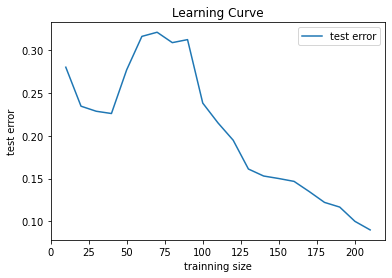

In [17]:
x_axis = np.arange(10,220,10)
plt.plot(x_axis,N_test_error,label = 'test error')
plt.legend()
plt.xlabel("trainning size")
plt.ylabel("test error")
plt.title("Learning Curve")

(d)

A

Manhattan Distance with p = 1

In [18]:
filt = (df['class']==1)
y1 = df[filt][:140]
y2 = df[filt][140:]
filt2 = (df['class']==0)
x1 = df[filt2][:70]
x2 = df[filt2][70:]
testing_set = x2,y2
trainning_set = x1.append(y1).drop(columns = ['class']).values

trainning_label = x1.append(y1)['class']
testing_set = x2.append(y2).drop(columns = ['class']).values
testing_label = x2.append(y2)['class']
test_error = []
train_error =  []
for i in range(1,201,5):
    KNN = KNeighborsClassifier(n_neighbors=i,p=1)
    KNN.fit(trainning_set,trainning_label)
    test_predict = KNN.predict(testing_set)
    test_error.append(1 - np.count_nonzero((test_predict == testing_label.values))/ len(test_predict))
    train_predict =  KNN.predict(trainning_set)
    train_error.append(1 - np.count_nonzero((train_predict == trainning_label.values))/ len(train_predict))  

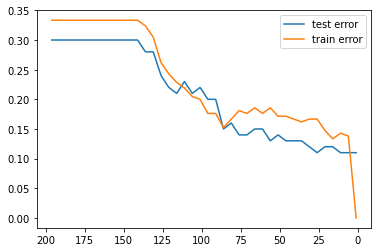

In [19]:
x_axis = np.arange(1,201,5)
plt.plot(x_axis,test_error,label = 'test error')
plt.plot(x_axis,train_error,label = 'train error')
plt.legend()
plt.gca().invert_xaxis()

| Best K value | Test Error|
| --- | --- |
| 6 |          0.11 |

B

In [20]:
filt = (df['class']==1)
y1 = df[filt][:140]
y2 = df[filt][140:]
filt2 = (df['class']==0)
x1 = df[filt2][:70]
x2 = df[filt2][70:]
testing_set = x2,y2
trainning_set = x1.append(y1).drop(columns = ['class']).values

trainning_label = x1.append(y1)['class']
testing_set = x2.append(y2).drop(columns = ['class']).values
testing_label = x2.append(y2)['class']
test_error = []
train_error =  []
i =0.1
while i <= 1:
    KNN = KNeighborsClassifier(n_neighbors=6,p= pow(10,i))
    KNN.fit(trainning_set,trainning_label)
    test_predict = KNN.predict(testing_set)
    test_error.append(1 - np.count_nonzero((test_predict == testing_label.values))/ len(test_predict))
    train_predict =  KNN.predict(trainning_set)
    train_error.append(1 - np.count_nonzero((train_predict == trainning_label.values))/ len(train_predict))
    i = i+0.1

In [21]:
test_error

[0.08999999999999997,
 0.08999999999999997,
 0.07999999999999996,
 0.07999999999999996,
 0.07999999999999996,
 0.06000000000000005,
 0.06999999999999995,
 0.07999999999999996,
 0.08999999999999997,
 0.08999999999999997]

we will choose the lowest error rate which is  0.06000000000000005

| Best K value | Test Error| Log10(p)|
| --- | --- |---|
| 6 |         0.060 | 0.6|

C

In [22]:
filt = (df['class']==1)
y1 = df[filt][:140]
y2 = df[filt][140:]
filt2 = (df['class']==0)
x1 = df[filt2][:70]
x2 = df[filt2][70:]
testing_set = x2,y2
trainning_set = x1.append(y1).drop(columns = ['class']).values

trainning_label = x1.append(y1)['class']
testing_set = x2.append(y2).drop(columns = ['class']).values
testing_label = x2.append(y2)['class']
test_error = []
train_error =  []
for i in range(1,201,5):
    KNN = KNeighborsClassifier(n_neighbors=i,p= float('inf'))
    KNN.fit(trainning_set,trainning_label)
    test_predict = KNN.predict(testing_set)
    test_error.append(1 - np.count_nonzero((test_predict == testing_label.values))/ len(test_predict))
    train_predict =  KNN.predict(trainning_set)
    train_error.append(1 - np.count_nonzero((train_predict == trainning_label.values))/ len(train_predict))  

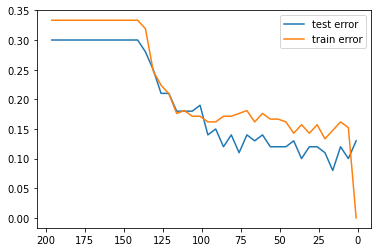

In [23]:
x_axis = np.arange(1,201,5)
plt.plot(x_axis,test_error,label = 'test error')
plt.plot(x_axis,train_error,label = 'train error')
plt.legend()
plt.gca().invert_xaxis()

| Best K value | Test Error|
| --- | --- |
| 16 |          0.08|

ii.
Mahalanobis Distance

In [24]:
filt = (df['class']==1)
y1 = df[filt][:140]
y2 = df[filt][140:]
filt2 = (df['class']==0)
x1 = df[filt2][:70]
x2 = df[filt2][70:]
testing_set = x2,y2
trainning_set = x1.append(y1).drop(columns = ['class']).values

trainning_label = x1.append(y1)['class']
testing_set = x2.append(y2).drop(columns = ['class']).values
testing_label = x2.append(y2)['class']
test_error = []
train_error =  []
for i in range(1,201,5):
    KNN = KNeighborsClassifier(n_neighbors=i,metric = 'mahalanobis',metric_params={'VI': np.cov(trainning_set, rowvar=False)})
    KNN.fit(trainning_set,trainning_label)
    test_predict = KNN.predict(testing_set)
    test_error.append(1 - np.count_nonzero((test_predict == testing_label.values))/ len(test_predict))
    train_predict =  KNN.predict(trainning_set)
    train_error.append(1 - np.count_nonzero((train_predict == trainning_label.values))/ len(train_predict))  

In [25]:
min(test_error)

0.07999999999999996

| Best K value | Test Error|
| --- | --- |
| 6 |          0.08|

| Distance | Best K value | Test Error |
| --- | --- |  --- | 
| Manhattan Distance  |          6|    0.11 |
| Best log10(p) = 0.6  |          6|    0.06 |
| Chebyshev Distance  |          16 |    0.08 | 
|   Mahalanobis Distance |          6 |    0.08 |

(e)

Euclidean Distance

In [26]:
filt = (df['class']==1)
y1 = df[filt][:140]
y2 = df[filt][140:]
filt2 = (df['class']==0)
x1 = df[filt2][:70]
x2 = df[filt2][70:]
testing_set = x2,y2
trainning_set = x1.append(y1).drop(columns = ['class']).values

trainning_label = x1.append(y1)['class']
testing_set = x2.append(y2).drop(columns = ['class']).values
testing_label = x2.append(y2)['class']
test_error = []
train_error =  []
for i in range(1,201,5):
    KNN = KNeighborsClassifier(n_neighbors=i,p = 2 ,weights = 'distance')
    KNN.fit(trainning_set,trainning_label)
    test_predict = KNN.predict(testing_set)
    test_error.append(1 - np.count_nonzero((test_predict == testing_label.values))/ len(test_predict))
    train_predict =  KNN.predict(trainning_set)
    train_error.append(1 - np.count_nonzero((train_predict == trainning_label.values))/ len(train_predict))  

In [27]:
min(test_error)

0.09999999999999998

| Best K value | Test Error|
| --- | --- |
| 6 |          0.1|

Manhattan Distance

In [28]:
filt = (df['class']==1)
y1 = df[filt][:140]
y2 = df[filt][140:]
filt2 = (df['class']==0)
x1 = df[filt2][:70]
x2 = df[filt2][70:]
testing_set = x2,y2
trainning_set = x1.append(y1).drop(columns = ['class']).values

trainning_label = x1.append(y1)['class']
testing_set = x2.append(y2).drop(columns = ['class']).values
testing_label = x2.append(y2)['class']
test_error = []
train_error =  []
for i in range(1,201,5):
    KNN = KNeighborsClassifier(n_neighbors=i,p = 1 ,weights = 'distance')
    KNN.fit(trainning_set,trainning_label)
    test_predict = KNN.predict(testing_set)
    test_error.append(1 - np.count_nonzero((test_predict == testing_label.values))/ len(test_predict))
    train_predict =  KNN.predict(trainning_set)
    train_error.append(1 - np.count_nonzero((train_predict == trainning_label.values))/ len(train_predict))  

In [29]:
min(test_error)

0.09999999999999998

| Best K value | Test Error|
| --- | --- |
| 26 |          0.1|

Chebyshev Distances 

In [30]:
filt = (df['class']==1)
y1 = df[filt][:140]
y2 = df[filt][140:]
filt2 = (df['class']==0)
x1 = df[filt2][:70]
x2 = df[filt2][70:]
testing_set = x2,y2
trainning_set = x1.append(y1).drop(columns = ['class']).values

trainning_label = x1.append(y1)['class']
testing_set = x2.append(y2).drop(columns = ['class']).values
testing_label = x2.append(y2)['class']
test_error = []
train_error =  []
for i in range(1,201,5):
    KNN = KNeighborsClassifier(n_neighbors=i,p = float('inf') ,weights = 'distance')
    KNN.fit(trainning_set,trainning_label)
    test_predict = KNN.predict(testing_set)
    test_error.append(1 - np.count_nonzero((test_predict == testing_label.values))/ len(test_predict))
    train_predict =  KNN.predict(trainning_set)
    train_error.append(1 - np.count_nonzero((train_predict == trainning_label.values))/ len(train_predict))  

In [31]:
min(test_error)

0.10999999999999999

In [32]:
test_error

[0.13,
 0.13,
 0.12,
 0.10999999999999999,
 0.12,
 0.12,
 0.10999999999999999,
 0.10999999999999999,
 0.10999999999999999,
 0.12,
 0.12,
 0.12,
 0.10999999999999999,
 0.13,
 0.12,
 0.12,
 0.12,
 0.14,
 0.13,
 0.14,
 0.14,
 0.14,
 0.14,
 0.14,
 0.15000000000000002,
 0.14,
 0.16000000000000003,
 0.16000000000000003,
 0.18000000000000005,
 0.18999999999999995,
 0.20999999999999996,
 0.20999999999999996,
 0.22999999999999998,
 0.26,
 0.26,
 0.26,
 0.27,
 0.27,
 0.27,
 0.28]

| Best K value | Test Error|
| --- | --- |
| 16 |          0.11|

| Distance | Best K value | Test Error |
| --- | --- |  --- | 
|  Euclidean Distance |          6|    0.1 |
| Manhattan Distance   |          26 |    0.1 | 
|  Chebyshev Distance |          16 |    0.11 |

(f)

The lowest trainning error is 0 when k = 1. This is because we choose the closest training sample to the test sample. Since the test sample is in the training dataset, it will choose itself as the closest. For this reason, the training error will be 0 when K = 1, irrespective of the dataset.